[[ 1351   396   376]
 [  213  2561   789]
 [  241   650 12389]]


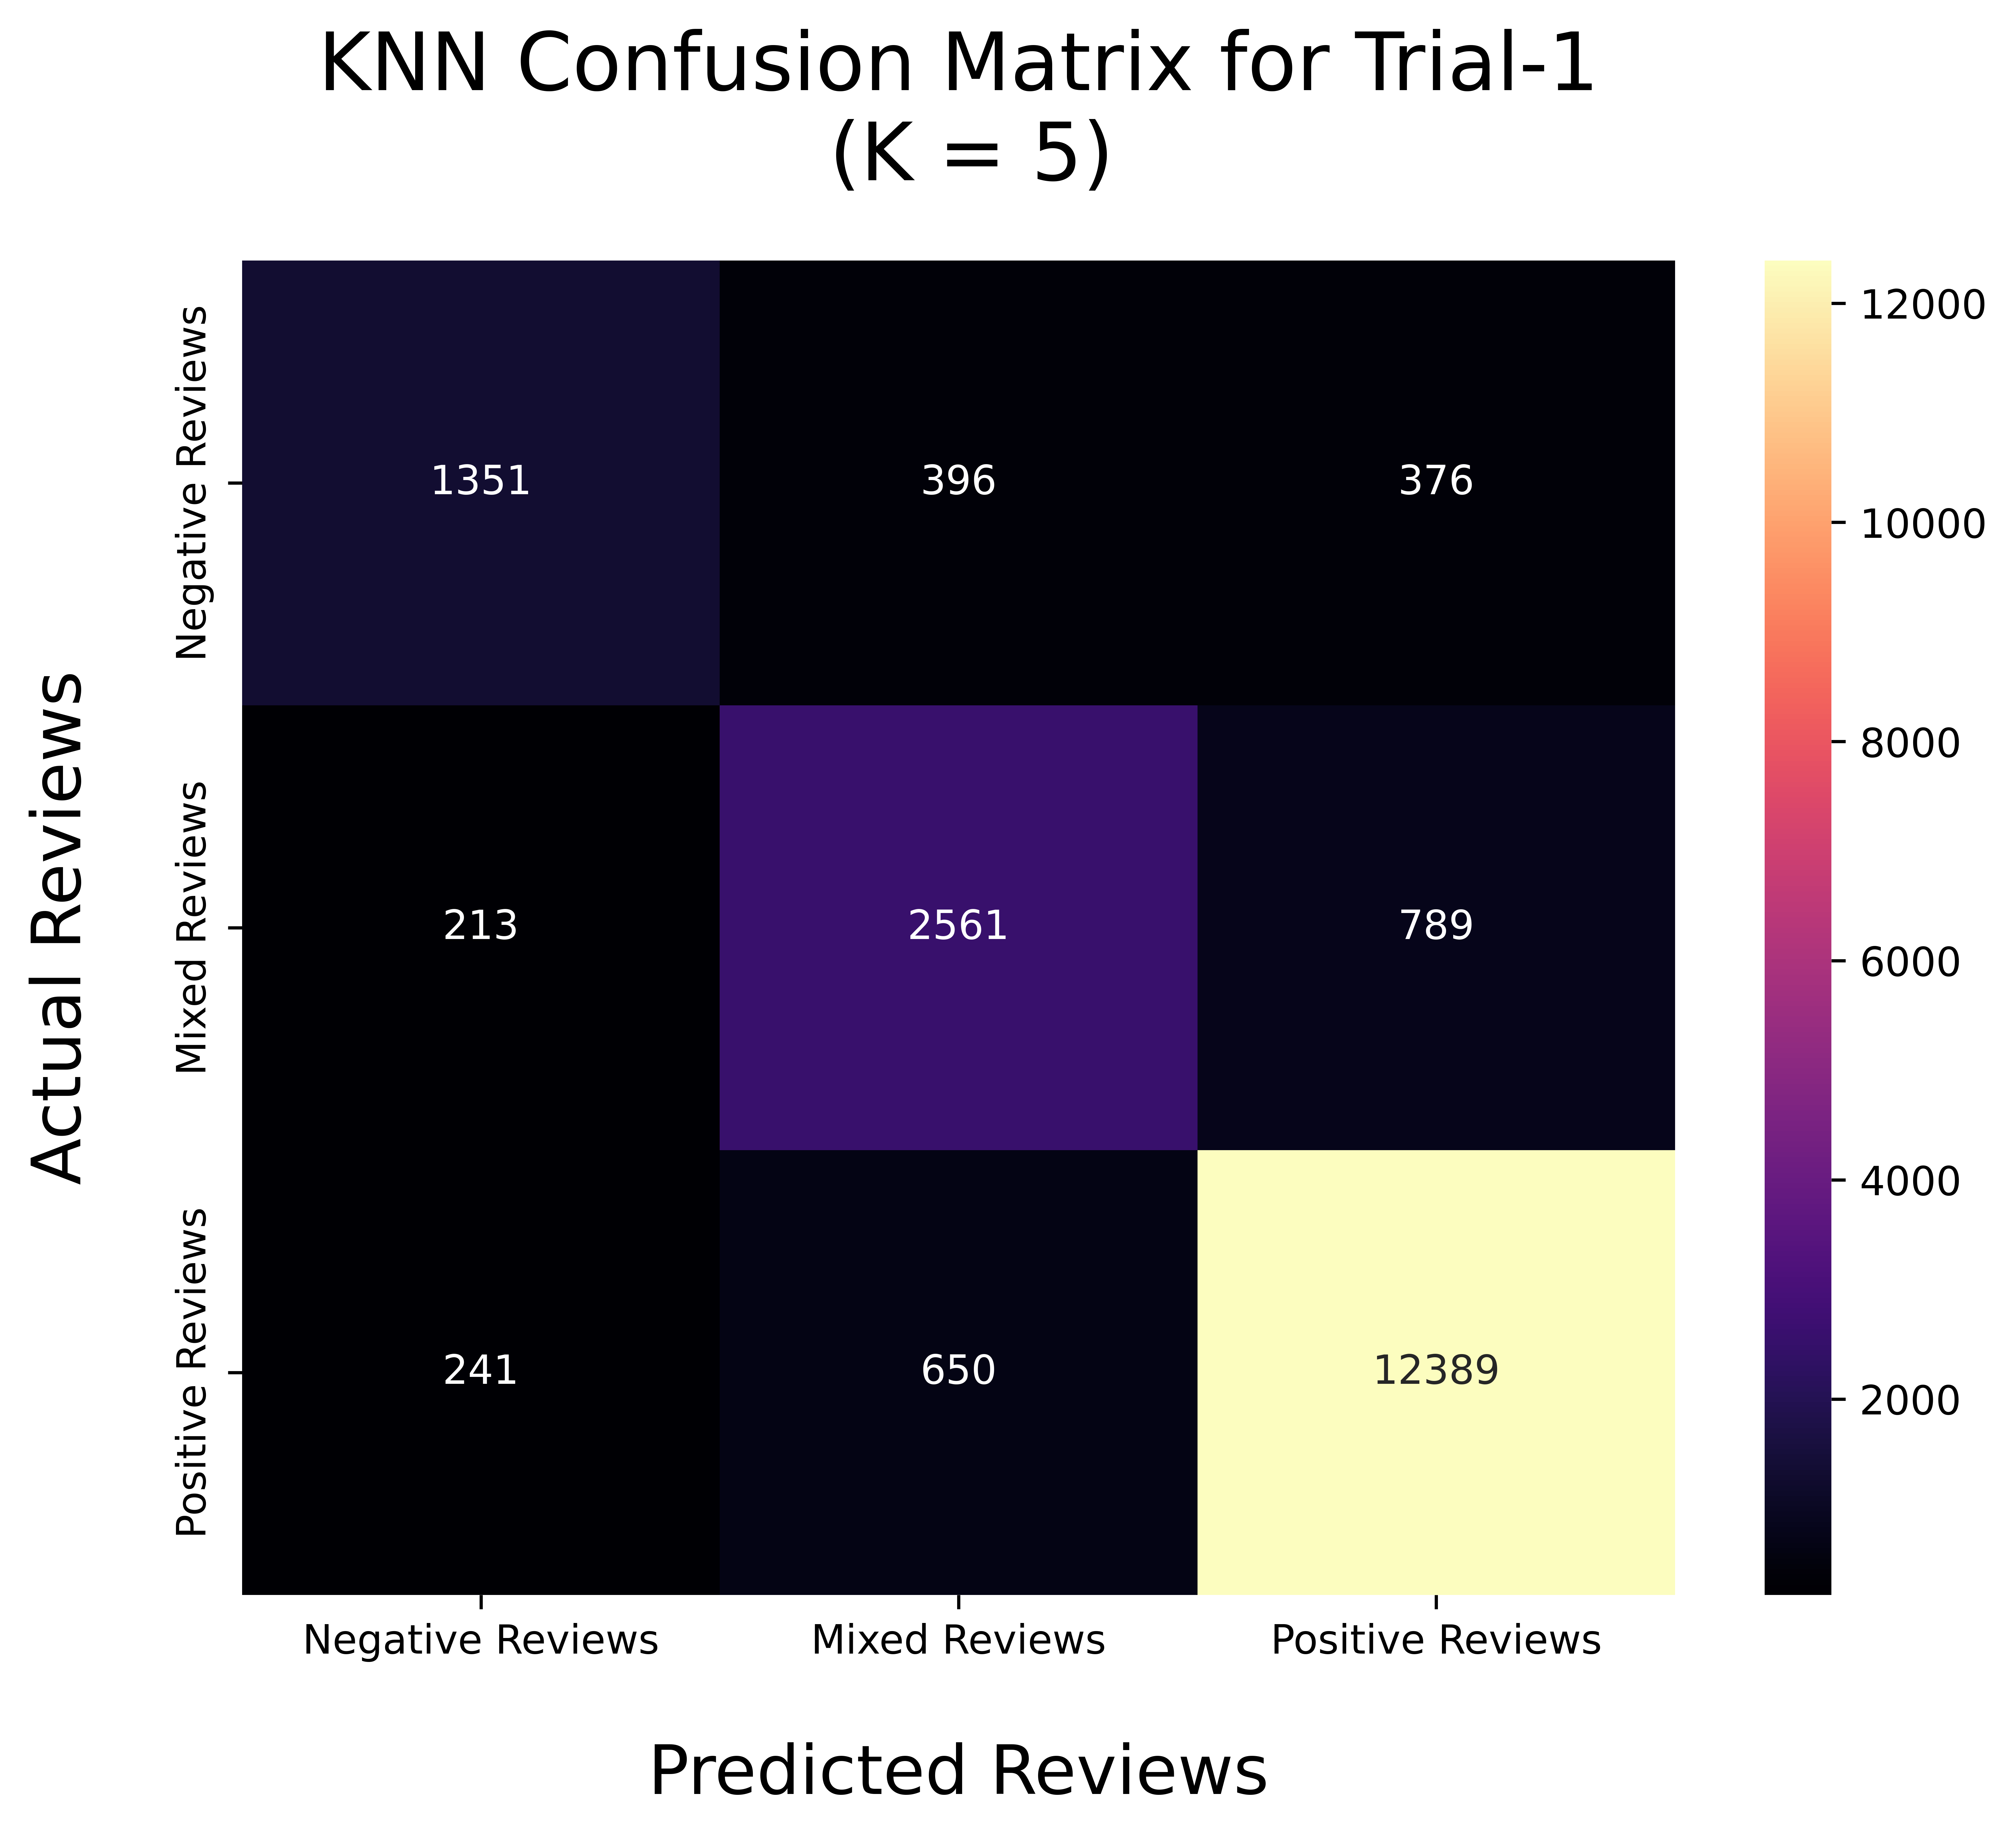

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

df = pd.read_csv("../processed.csv")

def normalise(feature, df):
    mean = df[feature].mean()
    sd = df[feature].std()
    df[feature] = (df[feature] - mean) / sd

normalise("Initial_Price", df)
normalise("Final_Price", df)
normalise("Positive_Reviews", df)
normalise("Negative_Reviews", df)
normalise("Memory_MB", df)
normalise("Storage_MB", df)

y = df["target"]
X = df.drop(labels=["target"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.33, random_state=100,shuffle=True)

knn = KNeighborsClassifier(n_neighbors=5,weights='distance') 
knn.fit(X_train,y_train)

pred = knn.predict(X_test)

conf1 = confusion_matrix(y_test,pred)
print(conf1)



# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=1000)
 
# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(conf1, annot=True, fmt='d',cmap='magma' )
 
# set x-axis label and ticks. 
ax.set_xlabel("Predicted Reviews", fontsize=17, labelpad=20)
ax.xaxis.set_ticklabels(['Negative Reviews','Mixed Reviews','Positive Reviews'])
 
# set y-axis label and ticks
ax.set_ylabel("Actual Reviews", fontsize=17, labelpad=20)
ax.yaxis.set_ticklabels(['Negative Reviews','Mixed Reviews','Positive Reviews'])
 
# set plot title
ax.set_title("KNN Confusion Matrix for Trial-1\n (K = 5)", fontsize=20, pad=20)
 
plt.show()